In [1]:
from clusters import algs

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

csv = 'ligand_information.csv'
ligands = algs.read_ligand_csv(csv)

distanceMatrix = np.load('distanceMatrix4.npy')

#### Question 1:

I used the Tanimoto Coefficient to calculate the similarity between molecules.  The Tanimoto coefficient is equal to the intersection between the two molecules' on bits, divided by the union of the two molecules' on bits.

     Tanimoto Coeff. = J(A, B) = | A ∩ B | / | A ∪ B |

#### Question 2:
- Dimensionality reduction algorithm to visualize molecule dataset

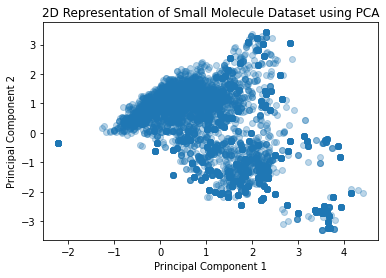

In [2]:
x = [ligand.bitstring for ligand in ligands]
x = np.array(x)

pca = PCA(n_components=2)
pca.fit(x)
#print(pca.singular_values_)
x = pca.transform(x)

pc1 = x[:, 0]
pc2 = x[:, 1]

plt.scatter(pc1, pc2, alpha=0.3)
plt.title('2D Representation of Small Molecule Dataset using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Question 3:

Partitional Clustering --> Visualizing Clusters on PCA plot

In [8]:
## Code I ran to populate and save the distance matrix:
# hc2 = algs.HierarchicalClustering()
# distanceMatrix2 = hc2.makeDistanceMatrix(ligands)
# np.save('distanceMatrix2.npy', distanceMatrix2)
# distanceMatrix2 has -1's for ligand's dist from itself. dM3 has 0's. dM4 has 1's.

distanceMatrix = np.load('distanceMatrix4.npy')

In [6]:
pc = algs.PartitionClustering()

In [9]:
# Determine the optimal number of clusters (from 3 - 10)

ave_sc = -2
k = 3
numTrials = 3 # number of trials per k

for numClusters in range(3,11):
    all_scs = []
    for trial in range(numTrials):
        pcclusters = pc.cluster(ligands, distanceMatrix, numClusters, verbose = False)
        curr_sc = algs.silhouetteCoeff(pcclusters, distanceMatrix)
        all_scs.append(curr_sc)
        print('Silhouette Coeff = %.4f for %d clusters, trial %d' % (curr_sc, numClusters, trial))
    new_sc = sum(all_scs) / len(all_scs)
    if new_sc > ave_sc:
        ave_sc = new_sc
        k = numClusters
print('Optimal number of clusters = %d' % k)


Silhouette Coeff = 0.4044 for 3 clusters, trial 0
Silhouette Coeff = 0.4076 for 3 clusters, trial 1
Silhouette Coeff = 0.4019 for 3 clusters, trial 2
Silhouette Coeff = 0.3729 for 4 clusters, trial 0
Silhouette Coeff = 0.4089 for 4 clusters, trial 1
Silhouette Coeff = 0.4049 for 4 clusters, trial 2
Silhouette Coeff = 0.4115 for 5 clusters, trial 0
Silhouette Coeff = 0.4081 for 5 clusters, trial 1
Silhouette Coeff = 0.4002 for 5 clusters, trial 2
Silhouette Coeff = 0.1757 for 6 clusters, trial 0
Silhouette Coeff = 0.2799 for 6 clusters, trial 1
Silhouette Coeff = 0.1757 for 6 clusters, trial 2
Silhouette Coeff = 0.3781 for 7 clusters, trial 0
Silhouette Coeff = 0.3732 for 7 clusters, trial 1
Silhouette Coeff = 0.3755 for 7 clusters, trial 2
Silhouette Coeff = 0.3883 for 8 clusters, trial 0
Silhouette Coeff = 0.3863 for 8 clusters, trial 1
Silhouette Coeff = 0.1793 for 8 clusters, trial 2
Silhouette Coeff = 0.3695 for 9 clusters, trial 0
Silhouette Coeff = 0.1660 for 9 clusters, trial 1


In [7]:
# With K = 5:

pcclusters = pc.cluster(ligands, distanceMatrix, numClusters = 5, verbose = False)

In [8]:
for cluster in pcclusters:
    print(len(cluster.ligands))
sc = algs.silhouetteCoeff(pcclusters, distanceMatrix)
print('Silhouette Coeff = %.4f' % sc)

3936
2983
57
1150
398
Silhouette Coeff = 0.4004


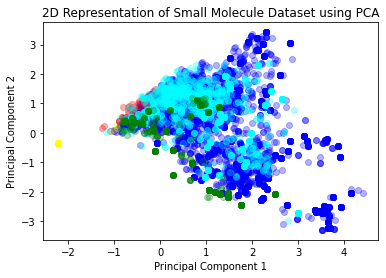

In [9]:
i = 0
colors = ['blue', 'yellow', 'red', 'cyan', 'green', 'orange', 'purple', 'black']

x = [ligand.bitstring for ligand in ligands]
x = np.array(x)

pca = PCA(n_components=2)
pca.fit(x)
#print(pca.singular_values_)
x = pca.transform(x)

for cluster in pcclusters:
    pc1 = []
    pc2 = []
    for ligand in cluster.ligands:
        pc1.append(x[ligand.ligandIndex, 0])
        pc2.append(x[ligand.ligandIndex, 1])
    plt.scatter(pc1, pc2, color=colors[i], alpha=0.3)
    i+=1
    
plt.title('2D Representation of Small Molecule Dataset using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Question 4:

I chose to implement the K-Means++ partition clustering algorithm because it is fast and has logically chosen starting centroids. The algorithm works by choosing one initial centroid for each cluster it will have in the end. It chooses a first centroid randomly (from the list of examples), then chooses the rest of the centroids randomly based on a probability distribution which is proportional to the examples' distances from the existing centroids. Each example is then clustered with its nearest centroid, and the centroids of each cluster are recalculated. Then the entire process is repeated until the centroids don't move anymore (the algorithm converges) (or, if the algorithm gets stuck in a loop, until a certain number of iterations have run).

K-Means++ is sensitive to initialization conditions because the first centroid is chosen by randomly assigning one example from the dataset as the first centroid, then all other centroids are picked from the examples randomly based off a probability distribution which is proportional to the examples' distances from the existing centroids.

I selected the number of clusters by running the clustering algorithm 3 times for each number of clusters from 3 to 10, then chose the number of clusters that had the highest average Silhouette Coefficient across its 3 trials.  This method suggested that 5 clusters was best for the given data.

#### Question 5:
Hierarchical Clustering --> Visualizing Clusters on PCA Plot

In [6]:
hc = algs.HierarchicalClustering()

In [18]:
# Determine the optimal number of clusters (from 3 - 10)
# While determining the optimal k-value, I'm only clustering 1000 ligands
# only need one trial per k-value since Hierarchical Clustering is deterministic

sc = -2
k = 3
numLigands = 1000

for numClusters in range(3,11):
    hcclusters = hc.cluster(ligands[:numLigands], distanceMatrix, numClusters, verbose = False)
    new_sc = algs.silhouetteCoeff(hcclusters, distanceMatrix)
    print('Silhouette Coeff = %.4f for %d clusters' % (new_sc, numClusters))
    
    cluster_lengths = []
    for cluster in hcclusters:
        cluster_lengths.append(len(cluster.ligands))
    print(cluster_lengths)
    
    if new_sc > sc:
        sc = new_sc
        k = numClusters
print('Optimal number of clusters = %d' % k)

Silhouette Coeff = 0.1112 for 3 clusters
[1, 15, 984]
Silhouette Coeff = 0.2963 for 4 clusters
[1, 15, 718, 266]
Silhouette Coeff = 0.3013 for 5 clusters
[1, 15, 4, 262, 718]
Silhouette Coeff = 0.3042 for 6 clusters
[1, 15, 4, 11, 262, 707]
Silhouette Coeff = 0.3046 for 7 clusters
[1, 15, 4, 703, 4, 11, 262]
Silhouette Coeff = 0.2975 for 8 clusters
[1, 2, 260, 15, 4, 703, 4, 11]
Silhouette Coeff = 0.2997 for 9 clusters
[1, 2, 2, 260, 9, 15, 4, 703, 4]
Silhouette Coeff = 0.3038 for 10 clusters
[1, 1, 2, 2, 3, 260, 9, 15, 4, 703]
Optimal number of clusters = 7


In [7]:
# Now that I've determined an optimal k-value (7), I'll cluster 1500 ligands

numLigands = 1500
numClusters = 7

hcclusters = hc.cluster(ligands[:numLigands], distanceMatrix, numClusters, verbose = False)

In [8]:
for cluster in hcclusters:
    print(len(cluster.ligands))
sc = algs.silhouetteCoeff(hcclusters, distanceMatrix)
print('Silhouette Coeff = %.4f' % sc)

13
3
5
1089
13
4
373
Silhouette Coeff = 0.2912


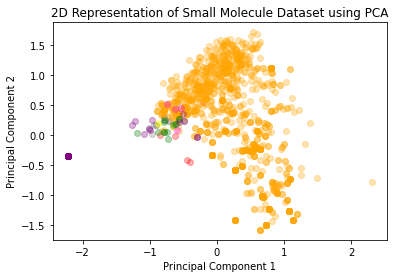

In [9]:
i = 0
colors = ['grey', 'yellow', 'red', 'orange', 'green', 'magenta', 'purple', 'black', 'blue', 'cyan']

x = [ligand.bitstring for ligand in ligands]
x = np.array(x)

pca = PCA(n_components=2)
pca.fit(x)
#print(pca.singular_values_)
x = pca.transform(x)

for cluster in hcclusters:
    pc1 = []
    pc2 = []
    for ligand in cluster.ligands:
        pc1.append(x[ligand.ligandIndex, 0])
        pc2.append(x[ligand.ligandIndex, 1])
    plt.scatter(pc1, pc2, color=colors[i], alpha=0.3)
    i+=1
    
plt.title('2D Representation of Small Molecule Dataset using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Question 6:

I chose to implement the average linkage hierarchical clustering algorithm, because it is logical to consider the average distance between all pairs of points in two clusters when determining the similarity between the two clusters. This algorithm works by choosing the two most similar examples, clustering them together, and recalculating this new cluster's distance to all the other examples (by averaging the distances of the two individual examples from all the other examples). The distance matrix, which contains the distances (which is proportional to similarity) between all the examples, is then updated with this new cluster's distances (and the rows and columns that correspond to the individual examples are removed from the distance matrix). This process is repeated, with the new two most similar examples (one of these examples could be the new cluster). The process continues until the desired number of clusters remains.

The average linkage hierarchical clustering algorithm is deterministic; it is not sensitive to initialization conditions.

I selected the number of clusters by running the clustering algorithm with each possible number of clusters from 3 to 10, calculating the Silhouette Coefficient for each resulting set of clusters, then choosing the number of clusters that yielded the highest Silhouette Coefficient.

#### Question 7:

K-Means++:
 - Number of Clusters = 5
 - Silhouette Coefficient = 0.4091* 
 
*this is the number I got from a previous run of the algorithm, and might not be reflected in the current outputs
 
Average Linkage Hierarchical Clustering:
 - Number of Clusters = 7
 - Silhouette Coefficient = 0.2912
 
---
I chose the Silhouette Coefficient as my clustering quality metric because it is simple and logical. It calculates both the similarity between elements in the same cluster and the differences between each element and every element in the other clusters, and uses this information about the 'cohesion' and 'separation' of clusters to quantify the quality of the clusters given the data.

The Silhouette Coefficient ranges from -1 (clustering is wrong) to 0 (clustering is neutral) to 1 (all clusters are very cohesive and very separated from eachother. i.e. they were clustered very well).  Since K-Means++ with 5 clusters had a silhouette coefficient of 0.4091, compared to average linkage hierarchical clustering with 7 clusters' 0.2912, K-Means++ clustering performed best according to the Silhouette Coefficient metric.

#### Question 8:

Use the Jaccard Index to compare the clusterings from K-Means++ (with 5 clusters) and Average Linkage Hierarchical Clustering (with 7 clusters).

In [10]:
ji = algs.jaccardIndex(hcclusters, pcclusters)

In [11]:
print(ji)

0.10674566682376925


(Question 8 Continued:)

The Jaccard Index of the two clusterings is 0.107.  Since the Jaccard Index ranges from 0 (the two clusterings are completely different) to 1 (the two clusterings are the same), this value of 0.107 suggests that the two clusterings are very different from each other.

#### Question 9:

Visualize AutoDock Vina scores for each cluster in K-Means++ clustering.

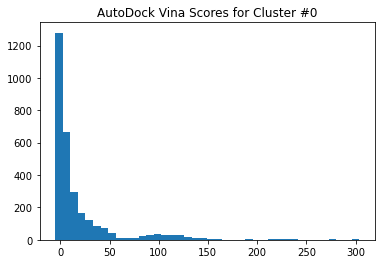

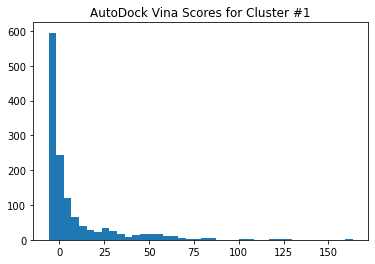

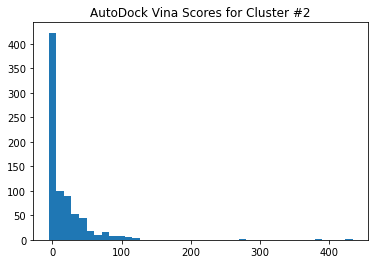

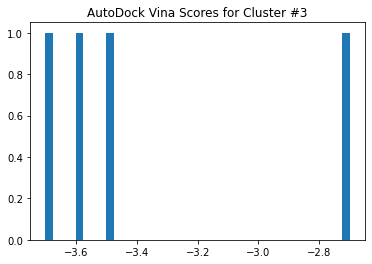

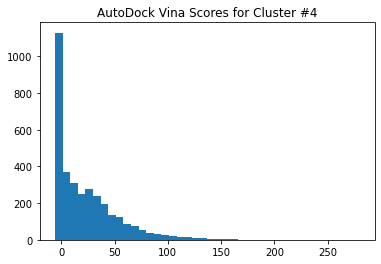

In [38]:
for i in range(len(pcclusters)):
    plt.hist([ligand.score for ligand in pcclusters[i].ligands], bins=40)
    plt.title('AutoDock Vina Scores for Cluster #%d' % i)
    plt.show()

(Question 9 Continued:)

In general, members of the same cluster do have similar docking scores, but this is largely because almost all of the docking scores are slightly below 0.  However, the distribution in Cluster #4 shows that there are many ligands in that cluster with docking scores in the 0-50 range, and thus many of the ligands in that cluster do have relatively similar docking scores.  Additionally, Cluster #3 only has 4 ligands in it, but their docking scores are all very similar (-3.7 to -2.7).  This could just be by chance, though, since the vast majority of ligands have docking scores around this range.

#### Question 10:

Visualize the top 5 scoring cluster heads from my K-Means++ clusters.

In [11]:
clusterHeads = []
for cluster in pcclusters:
    maxScore = 0
    maxScoreLigand = cluster.ligands[0]
    for ligand in cluster.ligands:
        if ligand.score > maxScore:
            maxScore = ligand.score
            maxScoreLigand = ligand
    clusterHeads.append(maxScoreLigand)

In [14]:
for ligand in clusterHeads:
    print((ligand.ligandID, ligand.score))

(8641, 279.7)
(8607, 303.8)
(3699, 2.9)
(8939, 434.3)
(6295, 108.6)


Ligand ID = 8641

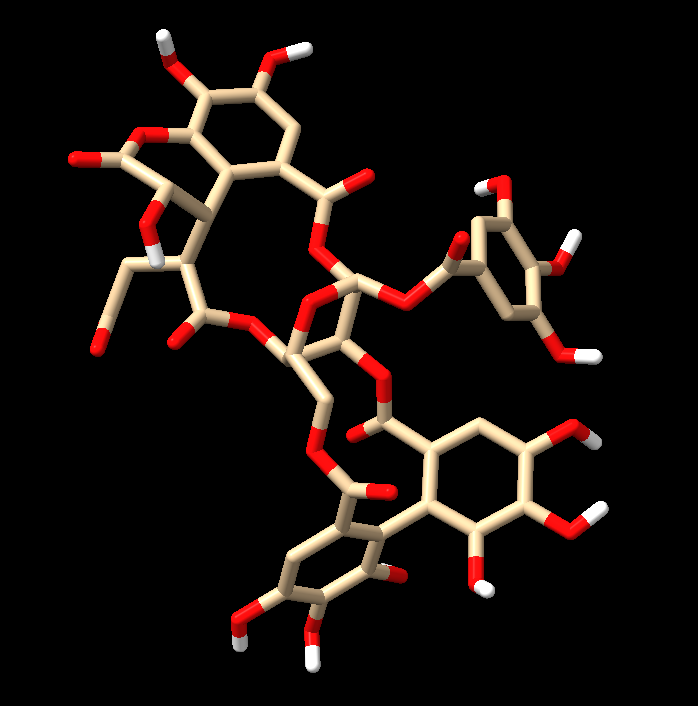

Ligand ID = 8607

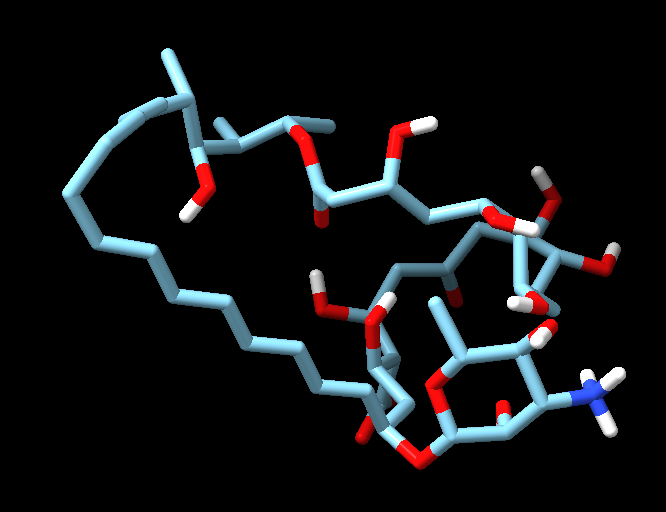

Ligand ID = 3699

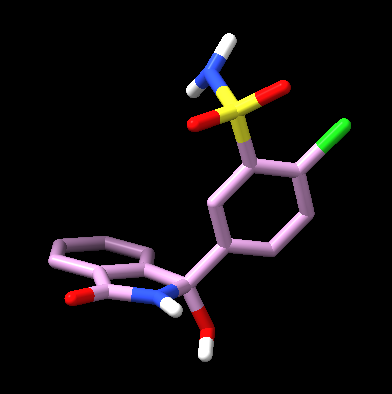

Ligand ID = 8939

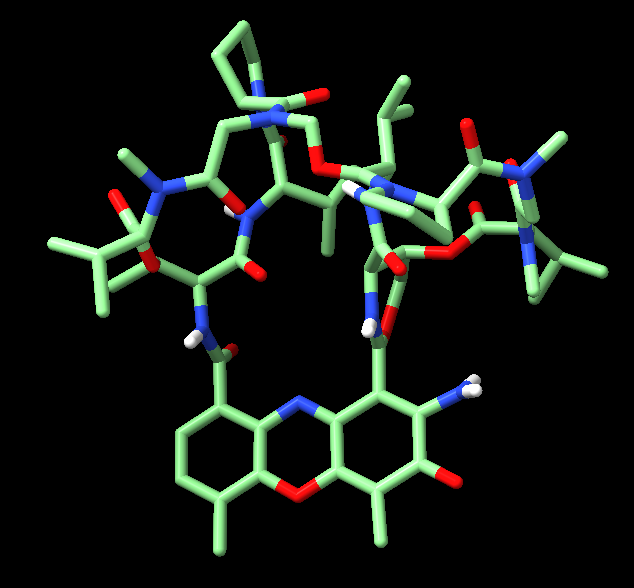

Ligand ID = 6295

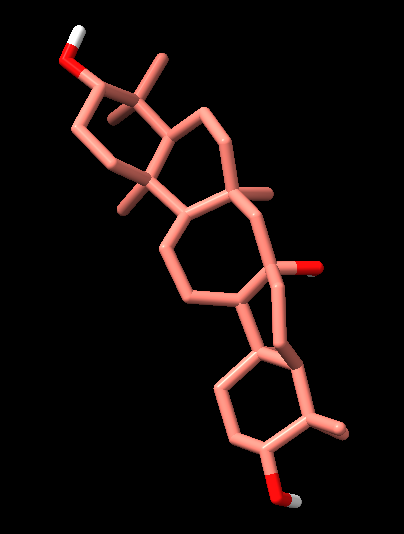

I chose to display these ligands without the receptor, since the receptor's coordinates don't seem to align with the ligand's coordinates, and thus the overlay of the ligands and the receptor do not seem to show the docking positions of the ligands (see below).

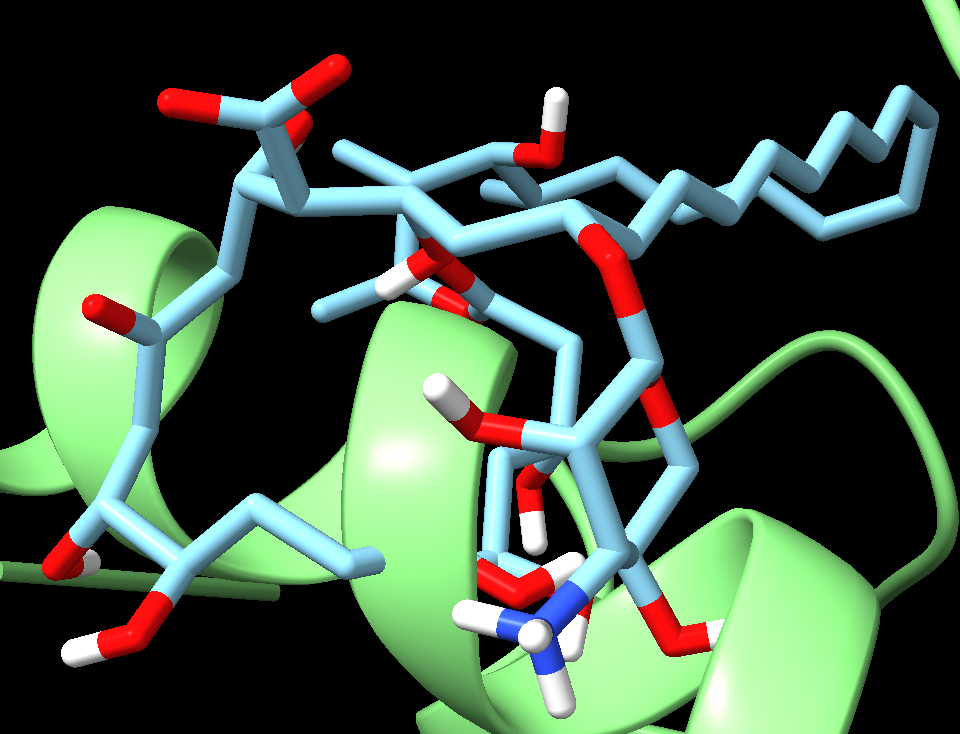

(The ligand's structure intersects with the receptor's structure, so the coordinates of the ligand and receptor files are not calibrated to show the structures of the ligands bound to the receptor.)

#### Question 10 continued:

Each of these 5 cluster heads is structurally diverse.

6746
13
67
1694
4
Silhouette Coeff = 0.1764


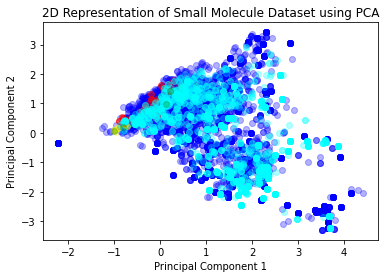

In [3]:
# For ji testing
pc = algs.PartitionClustering()

pcclusters2 = pc.cluster(ligands, distanceMatrix, numClusters = 5, verbose = False)

for cluster in pcclusters2:
    print(len(cluster.ligands))
sc = algs.silhouetteCoeff(pcclusters2, distanceMatrix)
print('Silhouette Coeff = %.4f' % sc)

i = 0
colors = ['blue', 'yellow', 'red', 'cyan', 'green', 'orange', 'purple', 'black']

x = [ligand.bitstring for ligand in ligands]
x = np.array(x)

pca = PCA(n_components=2)
pca.fit(x)
#print(pca.singular_values_)
x = pca.transform(x)

for cluster in pcclusters2:
    pc1 = []
    pc2 = []
    for ligand in cluster.ligands:
        pc1.append(x[ligand.ligandIndex, 0])
        pc2.append(x[ligand.ligandIndex, 1])
    plt.scatter(pc1, pc2, color=colors[i], alpha=0.3)
    i+=1
    
plt.title('2D Representation of Small Molecule Dataset using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

3936
138
2983
1069
398
Silhouette Coeff = 0.3721


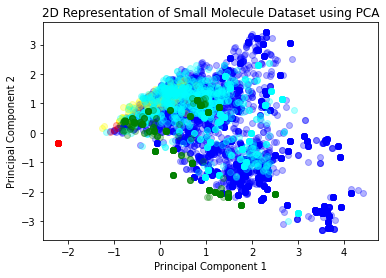

In [4]:
# For ji testing
pc = algs.PartitionClustering()

pcclusters3 = pc.cluster(ligands, distanceMatrix, numClusters = 5, verbose = False)

for cluster in pcclusters3:
    print(len(cluster.ligands))
sc = algs.silhouetteCoeff(pcclusters3, distanceMatrix)
print('Silhouette Coeff = %.4f' % sc)

i = 0
colors = ['blue', 'yellow', 'red', 'cyan', 'green', 'orange', 'purple', 'black']

x = [ligand.bitstring for ligand in ligands]
x = np.array(x)

pca = PCA(n_components=2)
pca.fit(x)
#print(pca.singular_values_)
x = pca.transform(x)

for cluster in pcclusters3:
    pc1 = []
    pc2 = []
    for ligand in cluster.ligands:
        pc1.append(x[ligand.ligandIndex, 0])
        pc2.append(x[ligand.ligandIndex, 1])
    plt.scatter(pc1, pc2, color=colors[i], alpha=0.3)
    i+=1
    
plt.title('2D Representation of Small Molecule Dataset using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [5]:
ji = algs.jaccardIndex(pcclusters2, pcclusters3)

In [6]:
print(ji)

0.3212016775089106


In [2]:
algs.test_hierarchical_clustering(distanceMatrix)

TypeError: list indices must be integers or slices, not tuple

In [2]:
algs.test_silhouette_coeff2()

[[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]]
sc = 1.0000
Silhouette Coefficient Test Passed


In [4]:
algs.test_silhouette_coeff(distanceMatrix)

sc = 1.0000
Silhouette Coefficient Test Passed


In [9]:
algs.test_hierarchical_clustering()

end cluster
end cluster
Hierarchical Clustering Test Passed


In [2]:
for i in range(20):
    algs.test_partition_clustering()

Partition Clustering Test Passed
Partition Clustering Test Passed
Partition Clustering Test Passed
Partition Clustering Test Passed
Partition Clustering Test Passed
Partition Clustering Test Passed
Partition Clustering Test Passed
Partition Clustering Test Passed
Partition Clustering Test Passed
Partition Clustering Test Passed
Partition Clustering Test Passed
Partition Clustering Test Passed
Partition Clustering Test Passed
Partition Clustering Test Passed
Partition Clustering Test Passed
Partition Clustering Test Passed
Partition Clustering Test Passed
Partition Clustering Test Passed
Partition Clustering Test Passed
Partition Clustering Test Passed


In [2]:
algs.test_make_distance_matrix()

Make Distance Matrix Test Passed
